## Data Collection & Preparation

* ``Pandas`` for managing the data
* ``NumPy`` for math operations
* ``Sklearn`` for Machine Learning
* ``Seaborn`` for advanced visualization
* ``Matplotlib`` for additional plotting

In [1]:
# Import libraries 

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
import warnings
from datetime import datetime, timedelta
warnings.filterwarnings("ignore", category=UserWarning)
%matplotlib inline

In [2]:
#read data files

cs = pd.read_csv("charging_sessions.csv")
wba = pd.read_csv("weather_burbank_airport.csv")

In [3]:
#print the first 5 rows of the charging_sessions dataset
cs.head()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."


In [4]:
#print out the first 5 rows of the weather burbank airport dataset
wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [5]:
#print out the columns of charging sessions dataset
cs.columns

Index(['Unnamed: 0', 'id', 'connectionTime', 'disconnectTime',
       'doneChargingTime', 'kWhDelivered', 'sessionID', 'siteID', 'spaceID',
       'stationID', 'timezone', 'userID', 'userInputs'],
      dtype='object')

In [6]:
#print out the columns of weather burbank airport dataset
wba.columns

Index(['city', 'timestamp', 'temperature', 'cloud_cover',
       'cloud_cover_description', 'pressure', 'windspeed', 'precipitation',
       'felt_temperature'],
      dtype='object')

In [7]:
#print out the tail of cs dataset to see how many entries there are
cs.tail()

,Unnamed: 0,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 19:19:47+00:00,2019-08-01 00:34:51+00:00,2019-07-31 21:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,1,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil..."
66449,10087,5d574ad2f9af8b4c10c03656,2019-07-31 19:21:47+00:00,2019-07-31 22:00:04+00:00,2019-07-31 20:51:34+00:00,0.897,1_1_178_817_2019-07-31 19:21:46.727697,1,AG-1F09,1-1-178-817,America/Los_Angeles,NaN,NaN


In [8]:
#print out the tail of cs dataset to see how many entries there are
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2021-01-01 07:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


### We will focus on the charging_sessions dataset for a while

In [9]:
#print information about cs dataset
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


We can see that this dataset has an unnamed column that represents the entry number. For better readability, we will rename this column

In [10]:
#rename the unnamed column
cs.rename( columns={'Unnamed: 0':'number'}, inplace=True )

In [11]:
#check if the column was renamed
cs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66450 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            66450 non-null  int64  
 1   id                66450 non-null  object 
 2   connectionTime    66450 non-null  object 
 3   disconnectTime    66450 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      66450 non-null  float64
 6   sessionID         66450 non-null  object 
 7   siteID            66450 non-null  int64  
 8   spaceID           66450 non-null  object 
 9   stationID         66450 non-null  object 
 10  timezone          66450 non-null  object 
 11  userID            49187 non-null  float64
 12  userInputs        49187 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.6+ MB


## Working with missing values

<p>We are going to follow some steps to work with the missing data. First we will Identify the missing data and then deal with it in order to start working with the dataset.

**Detecting missing numerical data**

From looking at the count of every column, we can see that the "doneChargingTime" has missing values. The missing values in the "userID" and "userInputs" columns are because the user was not registered, so we can ignore them for now.
</p>


In [12]:
#We use the next function to identify missing values:
missing_data = cs.isnull()
missing_data

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,False,False,False,False,False,False,False,False,False,False,False,False,False
66446,False,False,False,False,False,False,False,False,False,False,False,False,False
66447,False,False,False,False,False,False,False,False,False,False,False,False,False
66448,False,False,False,False,False,False,False,False,False,False,False,False,False


<p>The output we receive is a boolean value that indicates whether the value is in fact missing data.

We use next another function which will quicky give us the number of missing values in each column.
"True" represents a missing value and "False" represents that there exist a value in the cell.</p>

In [13]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

number
number
False    66450
Name: count, dtype: int64

id
id
False    66450
Name: count, dtype: int64

connectionTime
connectionTime
False    66450
Name: count, dtype: int64

disconnectTime
disconnectTime
False    66450
Name: count, dtype: int64

doneChargingTime
doneChargingTime
False    62362
True      4088
Name: count, dtype: int64

kWhDelivered
kWhDelivered
False    66450
Name: count, dtype: int64

sessionID
sessionID
False    66450
Name: count, dtype: int64

siteID
siteID
False    66450
Name: count, dtype: int64

spaceID
spaceID
False    66450
Name: count, dtype: int64

stationID
stationID
False    66450
Name: count, dtype: int64

timezone
timezone
False    66450
Name: count, dtype: int64

userID
userID
False    49187
True     17263
Name: count, dtype: int64

userInputs
userInputs
False    49187
True     17263
Name: count, dtype: int64



We can notice that the columns with missing values are: 

- "doneChargingTime": 4088 missing data 
- "userID": 17263 missing data 
- "userInputs": 17263 missing data 

In [14]:
#drop all rows containing null values
cs.dropna(axis=0, inplace=False)

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,1,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil..."
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,1,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil..."
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,1,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,1,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,1,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66444,10082,5d574ad2f9af8b4c10c03651,2019-07-31 14:50:17+00:00,2019-08-01 01:01:18+00:00,2019-07-31 20:29:24+00:00,27.174,1_1_191_784_2019-07-31 14:50:17.037367,1,AG-4F40,1-1-191-784,America/Los_Angeles,448.0,"[{'WhPerMile': 200, 'kWhRequested': 28.0, 'mil..."
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 18:40:41+00:00,2019-08-01 00:59:42+00:00,2019-07-31 21:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,1,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil..."
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 19:04:40+00:00,2019-07-31 22:44:22+00:00,2019-07-31 22:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,1,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi..."


In [15]:
#check how many rows are getting dropped
len(cs)-len(cs.dropna())

20442

This number is higher than expected, but because this factors in the null values from userID and userInputs(unregistered users or users with no Input), we want so specifically look for missing values in the "doneChargingTime"-column

In [16]:
len(cs)-len(cs.dropna(subset = ['doneChargingTime']))

4088

This number tells us that there are 4088 sessions with no timestamp for when the EV got done charging, meaning that it didn't fully charge. Let's look at this data.

In [17]:
#display records with 'doneCharging = Null
cs_notdone = cs[cs['doneChargingTime'].isnull()]
cs_notdone

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
3756,3756,5ea3848df9af8b428bf97225,2020-04-08 16:36:53+00:00,2020-04-09 03:43:29+00:00,NaN,25.183,1_1_194_822_2020-04-08 16:36:53.316264,1,AG-1F12,1-1-194-822,America/Los_Angeles,507.0,"[{'WhPerMile': 250, 'kWhRequested': 75.0, 'mil..."
3757,3757,5ea4d60df9af8b46573f1ee7,2020-04-09 13:23:52+00:00,2020-04-09 17:59:02+00:00,NaN,14.136,1_1_193_827_2020-04-09 13:23:51.689520,1,AG-1F02,1-1-193-827,America/Los_Angeles,419.0,"[{'WhPerMile': 400, 'kWhRequested': 40.0, 'mil..."
3758,3758,5ea4d60df9af8b46573f1ee8,2020-04-09 13:40:03+00:00,2020-04-09 21:43:22+00:00,NaN,14.203,1_1_178_823_2020-04-09 13:39:55.115497,1,AG-1F08,1-1-178-823,America/Los_Angeles,5065.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
3759,3759,5ea4d60df9af8b46573f1ee9,2020-04-09 14:01:53+00:00,2020-04-09 16:33:40+00:00,NaN,13.041,1_1_178_828_2020-04-09 14:01:53.467693,1,AG-1F10,1-1-178-828,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
3760,3760,5ea4d60df9af8b46573f1eea,2020-04-09 15:01:06+00:00,2020-04-09 23:38:08+00:00,NaN,5.797,1_1_193_820_2020-04-09 15:01:06.343454,1,AG-1F04,1-1-193-820,America/Los_Angeles,466.0,"[{'WhPerMile': 300, 'kWhRequested': 6.0, 'mile..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
60411,4049,5cb3d2a8f9af8b4551261e75,2019-03-30 00:32:10+00:00,2019-03-30 02:23:14+00:00,NaN,11.148,1_1_193_829_2019-03-30 00:32:10.128651,1,AG-1F03,1-1-193-829,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 24.0, 'mil..."
61097,4735,5cc8e891f9af8b45d975b819,2019-04-14 16:19:12+00:00,2019-04-14 20:38:39+00:00,NaN,11.678,1_1_193_816_2019-04-14 16:19:11.864262,1,AG-1F05,1-1-193-816,America/Los_Angeles,364.0,"[{'WhPerMile': 400, 'kWhRequested': 56.0, 'mil..."
61103,4741,5cca3a54f9af8b49aaa4cbac,2019-04-15 13:00:59+00:00,2019-04-15 13:55:25+00:00,NaN,3.343,1_1_193_819_2019-04-15 13:00:58.722284,1,AG-1F06,1-1-193-819,America/Los_Angeles,651.0,"[{'WhPerMile': 400, 'kWhRequested': 20.0, 'mil..."
61117,4755,5cca3a54f9af8b49aaa4cbba,2019-04-15 13:52:45+00:00,2019-04-15 14:47:01+00:00,NaN,4.558,1_1_179_800_2019-04-15 13:52:44.693153,1,AG-3F32,1-1-179-800,America/Los_Angeles,194.0,"[{'WhPerMile': 400, 'kWhRequested': 12.0, 'mil..."


### Dealing with missing values

<p>When dealing with missing values, we can either **exclude** them from the dataset or **impute** the null values with estimates. However, it's challenging to impute timestamps since they represent the completion of charging, which did not occur in these cases. Estimating a value for these timestamps doesn't make sense because the EV never finished charging.

Additionally, our goal is to optimize utilization, and including data points where the EV never fully charged (and thus remained plugged in without charging, potentially hindering other EVs) is not appropriate. Therefore, we will exclude these data points.</p>

In [18]:
#we take every row where "doneChargingTime" is not null into our new dataset cs_clean
cs_clean = cs[cs['doneChargingTime'].notna()]

In [19]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


In [20]:
#we take every row where "doneChargingTime" is not null into our new dataset cs_clean
charging_sessions = cs[cs['doneChargingTime'].notna()]

In [21]:
charging_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   siteID            62362 non-null  int64  
 8   spaceID           62362 non-null  object 
 9   stationID         62362 non-null  object 
 10  timezone          62362 non-null  object 
 11  userID            46008 non-null  float64
 12  userInputs        46008 non-null  object 
dtypes: float64(2), int64(2), object(9)
memory usage: 6.7+ MB


In [22]:
#We can check now that the row "doneChargingTime" has not missing data:

missing_data2 = charging_sessions.isnull()
for column in missing_data2.columns.values.tolist():
    print(column)
    print(missing_data2[column].value_counts())
    print("")

number
number
False    62362
Name: count, dtype: int64

id
id
False    62362
Name: count, dtype: int64

connectionTime
connectionTime
False    62362
Name: count, dtype: int64

disconnectTime
disconnectTime
False    62362
Name: count, dtype: int64

doneChargingTime
doneChargingTime
False    62362
Name: count, dtype: int64

kWhDelivered
kWhDelivered
False    62362
Name: count, dtype: int64

sessionID
sessionID
False    62362
Name: count, dtype: int64

siteID
siteID
False    62362
Name: count, dtype: int64

spaceID
spaceID
False    62362
Name: count, dtype: int64

stationID
stationID
False    62362
Name: count, dtype: int64

timezone
timezone
False    62362
Name: count, dtype: int64

userID
userID
False    46008
True     16354
Name: count, dtype: int64

userInputs
userInputs
False    46008
True     16354
Name: count, dtype: int64



### Quality Checks
Now, we have to do some **quality checks** to ensure that our data does not have any errors and that the entries make sense. First, lets check station and spaceIDs.

In [23]:
charging_sessions['stationID'].nunique()

106

In [24]:
charging_sessions['spaceID'].nunique()

106

In [25]:
charging_sessions['stationID'].unique()

array(['1-1-179-810', '1-1-193-825', '1-1-193-829', '1-1-193-820',
       '1-1-193-819', '1-1-194-821', '1-1-178-817', '1-1-191-804',
       '1-1-194-826', '1-1-178-823', '1-1-179-788', '1-1-194-818',
       '1-1-178-824', '1-1-194-822', '1-1-179-783', '1-1-193-816',
       '1-1-179-798', '1-1-178-828', '1-1-179-787', '1-1-191-792',
       '1-1-193-827', '1-1-179-777', '1-1-179-799', '1-1-179-796',
       '1-1-179-815', '1-1-179-797', '1-1-179-781', '1-1-179-800',
       '1-1-179-809', '1-1-179-791', '1-1-179-794', '1-1-179-779',
       '1-1-179-801', '1-1-179-790', '1-1-191-802', '1-1-191-789',
       '1-1-191-806', '1-1-191-785', '1-1-191-808', '1-1-191-782',
       '1-1-179-813', '1-1-191-795', '1-1-191-807', '1-1-191-812',
       '1-1-191-803', '1-1-191-778', '1-1-191-811', '1-1-191-780',
       '1-1-191-786', '1-1-191-793', '1-1-191-784', '1-1-191-805',
       '2-39-138-566', '2-39-79-379', '2-39-79-378', '2-39-139-28',
       '2-39-79-377', '2-39-125-21', '2-39-127-19', '2-39-79-

In [26]:
charging_sessions['spaceID'].unique()

array(['AG-3F30', 'AG-1F01', 'AG-1F03', 'AG-1F04', 'AG-1F06', 'AG-1F13',
       'AG-1F09', 'AG-4F34', 'AG-1F11', 'AG-1F08', 'AG-3F22', 'AG-1F14',
       'AG-1F07', 'AG-1F12', 'AG-3F29', 'AG-1F05', 'AG-3F18', 'AG-1F10',
       'AG-3F16', 'AG-4F37', 'AG-1F02', 'AG-3F28', 'AG-3F25', 'AG-3F24',
       'AG-3F33', 'AG-3F23', 'AG-3F31', 'AG-3F32', 'AG-3F27', 'AG-3F26',
       'AG-3F20', 'AG-3F17', 'AG-3F21', 'AG-3F19', 'AG-4F44', 'AG-4F52',
       'AG-4F41', 'AG-4F48', 'AG-4F35', 'AG-4F50', 'AG-3F15', 'AG-4F51',
       'AG-4F47', 'AG-4F46', 'AG-4F49', 'AG-4F43', 'AG-4F42', 'AG-4F45',
       'AG-4F36', 'AG-4F38', 'AG-4F40', 'AG-4F39', 'CA-512', 'CA-327',
       'CA-326', 'CA-303', 'CA-325', 'CA-311', 'CA-309', 'CA-491',
       'CA-493', 'CA-499', 'CA-323', 'CA-313', 'CA-324', 'CA-513',
       'CA-305', 'CA-317', 'CA-510', 'CA-315', 'CA-321', 'CA-490',
       'CA-497', 'CA-489', 'CA-319', 'CA-492', 'CA-494', 'CA-502',
       'CA-500', 'CA-495', 'CA-498', 'CA-304', 'CA-307', 'CA-306',
       'CA

We see that both stationID and spaceID have 106 entries, so we will assume that they are mapped 1:1. spaceID most likely describes the parking space and stationID the charging station besides that parking space.

Now, lets turn timestamp data into the right datatypes

In [27]:
charging_sessions['connectionTime'] = pd.to_datetime(charging_sessions['connectionTime'])
charging_sessions['disconnectTime'] = pd.to_datetime(charging_sessions['disconnectTime'])
charging_sessions['doneChargingTime'] = pd.to_datetime(charging_sessions['doneChargingTime'])

C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\257518988.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_sessions['connectionTime'] = pd.to_datetime(charging_sessions['connectionTime'])
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\257518988.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_sessions['disconnectTime'] = pd.to_datetime(charging_sessions['disconnectTime'])
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\257518988.py:3: SettingWithCopyWarning: 
A value is trying

In [28]:
charging_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   number            62362 non-null  int64              
 1   id                62362 non-null  object             
 2   connectionTime    62362 non-null  datetime64[ns, UTC]
 3   disconnectTime    62362 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      62362 non-null  float64            
 6   sessionID         62362 non-null  object             
 7   siteID            62362 non-null  int64              
 8   spaceID           62362 non-null  object             
 9   stationID         62362 non-null  object             
 10  timezone          62362 non-null  object             
 11  userID            46008 non-null  float64            
 12  userInputs        46008 non-null  object             
dtypes: dat

### Logic checks
Now we want to check if the data makes sense. For that, we will check three things. First, we will check if every **connectionTime** timestamp comes before the corresponding **disconnectTime** timestamp. An EV first has to connect to the station if it wants to disconnect from it. Second, we want to check if every **doneChargingTime** comes after every **connectionTime**, because an EV has to be still connected to be done charging. Lastly, we want to check if there are **doneChargingTime**s that come after **disconnectTime**. This would make no sense, because an unplugged EV can not be done charging after it got unplugged.


In [29]:
len(charging_sessions[charging_sessions['connectionTime']>charging_sessions['disconnectTime']])

0

There are no entries where connectionTime comes before disconnectTime

In [30]:
len(charging_sessions[charging_sessions['connectionTime']>charging_sessions['doneChargingTime']])

27

There are 27 entries where connectionTime comes after doneChargingTime. Lets further investigate.

In [31]:
charging_sessions[charging_sessions['connectionTime']>charging_sessions['doneChargingTime']]

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
22219,2040,5c942ca4f9af8b06b04b3bb4,2019-03-05 19:13:55+00:00,2019-03-05 22:50:39+00:00,2019-03-05 19:12:56+00:00,0.706655,2_39_78_367_2019-03-05 19:13:55.113078,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN
22253,2074,5c957e1cf9af8b42f440af03,2019-03-06 20:26:30+00:00,2019-03-07 01:48:54+00:00,2019-03-06 20:25:34+00:00,1.046381,2_39_78_367_2019-03-06 20:26:30.479644,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN
23562,3383,5cca3a22f9af8b49aaa4cba0,2019-04-15 20:24:13+00:00,2019-04-15 23:39:04+00:00,2019-04-15 20:23:14+00:00,0.635278,2_39_78_367_2019-04-15 20:24:13.365605,2,CA-494,2-39-78-367,America/Los_Angeles,1154.0,"[{'WhPerMile': 308, 'kWhRequested': 9.24, 'mil..."
23586,3407,5ccb8ba6f9af8b4d9721df00,2019-04-16 16:11:08+00:00,2019-04-16 19:10:48+00:00,2019-04-16 16:10:11+00:00,0.585977,2_39_78_367_2019-04-16 16:11:07.939710,2,CA-494,2-39-78-367,America/Los_Angeles,1154.0,"[{'WhPerMile': 308, 'kWhRequested': 6.16, 'mil..."
27689,7510,5d856f1ff9af8b0c7bdf245c,2019-09-04 16:35:04+00:00,2019-09-05 00:44:27+00:00,2019-09-04 16:34:05+00:00,1.584500,2_39_78_367_2019-09-04 16:35:04.129327,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN
27740,7561,5d86c0a5f9af8b1022a81870,2019-09-05 18:44:57+00:00,2019-09-06 00:55:19+00:00,2019-09-05 18:43:57+00:00,1.067230,2_39_78_360_2019-09-05 18:44:57.410168,2,CA-322,2-39-78-360,America/Los_Angeles,NaN,NaN
29295,9116,5dcdffbdf9af8b220a19be8b,2019-10-29 17:22:32+00:00,2019-10-31 01:57:20+00:00,2019-10-29 17:21:33+00:00,6.316210,2_39_78_367_2019-10-29 17:22:32.086306,2,CA-494,2-39-78-367,America/Los_Angeles,1470.0,"[{'WhPerMile': 292, 'kWhRequested': 14.6, 'mil..."
31285,492,5bc91740f9af8b0dc677b860,2018-05-04 19:08:37+00:00,2018-05-04 22:07:47+00:00,2018-05-04 19:07:40+00:00,0.551722,2_39_78_363_2018-05-04 19:08:36.642114,2,CA-320,2-39-78-363,America/Los_Angeles,NaN,NaN
31287,494,5bc91740f9af8b0dc677b862,2018-05-04 19:23:52+00:00,2018-05-05 00:04:15+00:00,2018-05-04 19:22:52+00:00,0.912297,2_39_78_367_2018-05-04 19:23:51.897392,2,CA-494,2-39-78-367,America/Los_Angeles,NaN,NaN
31403,610,5bc917d0f9af8b0dc677b8d6,2018-05-07 20:47:51+00:00,2018-05-08 02:16:00+00:00,2018-05-07 20:47:50+00:00,14.967000,2_39_139_567_2018-05-07 20:47:50.862655,2,CA-513,2-39-139-567,America/Los_Angeles,NaN,NaN


If we take a closer look at these datapoints, we can see that for every datapoint where connectionTime > doneChargingTime holds true, the doneChargingTime occured round about a minute before the connectionTime. This can either be the system telling us that the EV was already full, or this could simply be an erroneous entry. Either way, only 27 entires are affected, so we decided to drop the entries.

In [32]:
charging_sessions.drop(charging_sessions[charging_sessions['connectionTime']>charging_sessions['doneChargingTime']].index,inplace=True)

C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\3982660818.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_sessions.drop(charging_sessions[charging_sessions['connectionTime']>charging_sessions['doneChargingTime']].index,inplace=True)


In [33]:
len(charging_sessions[charging_sessions['connectionTime']>charging_sessions['doneChargingTime']])

0

We succesfully got rid of these entries. Now lets check for the third requirement.

In [34]:
len(charging_sessions[charging_sessions['doneChargingTime']>charging_sessions['disconnectTime']])

4692

Almost 4700 entries, which is quite a lot. We can not simply delete these sessions, so lets further investigate.

In [35]:
charging_sessions[charging_sessions['doneChargingTime']>charging_sessions['disconnectTime']]

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
12,12,5e23b149f9af8b5fe4b973db,2020-01-02 15:04:38+00:00,2020-01-02 22:08:39+00:00,2020-01-02 22:09:36+00:00,25.567,1_1_178_824_2020-01-02 15:04:38.051735,1,AG-1F07,1-1-178-824,America/Los_Angeles,528.0,"[{'WhPerMile': 250, 'kWhRequested': 50.0, 'mil..."
20,20,5e23b149f9af8b5fe4b973e3,2020-01-02 15:28:47+00:00,2020-01-02 19:01:54+00:00,2020-01-02 19:02:51+00:00,7.417,1_1_193_827_2020-01-02 15:28:46.685366,1,AG-1F02,1-1-193-827,America/Los_Angeles,1283.0,"[{'WhPerMile': 350, 'kWhRequested': 42.0, 'mil..."
25,25,5e23b149f9af8b5fe4b973e8,2020-01-02 15:42:05+00:00,2020-01-02 21:58:45+00:00,2020-01-02 21:59:42+00:00,36.701,1_1_179_797_2020-01-02 15:42:05.217965,1,AG-3F23,1-1-179-797,America/Los_Angeles,474.0,"[{'WhPerMile': 400, 'kWhRequested': 32.0, 'mil..."
26,26,5e23b149f9af8b5fe4b973e9,2020-01-02 15:57:24+00:00,2020-01-02 16:35:37+00:00,2020-01-02 16:36:34+00:00,3.689,1_1_179_781_2020-01-02 15:57:23.951170,1,AG-3F31,1-1-179-781,America/Los_Angeles,724.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile..."
33,33,5e23b149f9af8b5fe4b973f0,2020-01-02 16:34:35+00:00,2020-01-02 18:49:41+00:00,2020-01-02 18:50:38+00:00,7.120,1_1_179_790_2020-01-02 16:34:34.999200,1,AG-3F19,1-1-179-790,America/Los_Angeles,2276.0,"[{'WhPerMile': 600, 'kWhRequested': 18.0, 'mil..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
66432,10070,5d574ad2f9af8b4c10c03645,2019-07-31 14:36:02+00:00,2019-07-31 22:34:10+00:00,2019-07-31 22:35:10+00:00,9.459,1_1_191_803_2019-07-31 14:36:02.181346,1,AG-4F49,1-1-191-803,America/Los_Angeles,826.0,"[{'WhPerMile': 250, 'kWhRequested': 35.0, 'mil..."
66439,10077,5d574ad2f9af8b4c10c0364c,2019-07-31 14:45:02+00:00,2019-07-31 23:43:20+00:00,2019-07-31 23:44:19+00:00,8.289,1_1_191_804_2019-07-31 14:45:01.555937,1,AG-4F34,1-1-191-804,America/Los_Angeles,572.0,"[{'WhPerMile': 231, 'kWhRequested': 9.24, 'mil..."
66440,10078,5d574ad2f9af8b4c10c0364d,2019-07-31 14:45:29+00:00,2019-07-31 22:01:32+00:00,2019-07-31 22:02:32+00:00,31.376,1_1_191_811_2019-07-31 14:45:29.388046,1,AG-4F42,1-1-191-811,America/Los_Angeles,1626.0,"[{'WhPerMile': 200, 'kWhRequested': 38.0, 'mil..."
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 18:08:04+00:00,2019-07-31 23:29:18+00:00,2019-07-31 23:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,1,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil..."


It becomes pretty apparent that the doneChargingTime also lies within a minute of the disconnectTime. This could mean that the station always delivers electricity for approx. another minute before it stops supplying energy. We will keep those entries, because discarding them would make us lose too many data points.

In [36]:
charging_sessions.nunique()

number              15277
id                  60923
connectionTime      60734
disconnectTime      60801
doneChargingTime    60610
kWhDelivered        24656
sessionID           60923
siteID                  2
spaceID               106
stationID             106
timezone                1
userID                888
userInputs          44638
dtype: int64

### Handle userInput and userID 
Working with the userInput and userID columns can be problematic. According to the task manual, they can change overtime. The amount of miles and Kwh request per user can change, which results in multiple userInputs per row. The data is complex to preprocess. And for the given task, we have not thought of a way on how we are going to use this data yet. This may change in the future, but as of now, we will ignore these columns, so we drop them.

In [37]:
charging_sessions.drop(columns=['userID', 'userInputs'],inplace=True)

C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\862065095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charging_sessions.drop(columns=['userID', 'userInputs'],inplace=True)


In [38]:
charging_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62335 entries, 0 to 66449
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   number            62335 non-null  int64              
 1   id                62335 non-null  object             
 2   connectionTime    62335 non-null  datetime64[ns, UTC]
 3   disconnectTime    62335 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62335 non-null  datetime64[ns, UTC]
 5   kWhDelivered      62335 non-null  float64            
 6   sessionID         62335 non-null  object             
 7   siteID            62335 non-null  int64              
 8   spaceID           62335 non-null  object             
 9   stationID         62335 non-null  object             
 10  timezone          62335 non-null  object             
dtypes: datetime64[ns, UTC](3), float64(1), int64(2), object(5)
memory usage: 5.7+ MB


### Outliers
Last thing we need to do, is delete outlier data form our dataset. An outlier is a data point that differs significantly from other observations. In our case, it would be a session which was too long, lets say more than 20 hours. Lets look for these sessions. To do that, we need to first figure out the length of the session. We will handle outliers in 02_Descriptive Analytics.

## Weather data preparation

We first have to think of a way we want to utilize the weather data and manipulate the dataframe based on our plan.

In [39]:
wba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city                     29244 non-null  object 
 1   timestamp                29244 non-null  object 
 2   temperature              29219 non-null  float64
 3   cloud_cover              29224 non-null  float64
 4   cloud_cover_description  29224 non-null  object 
 5   pressure                 29236 non-null  float64
 6   windspeed                29158 non-null  float64
 7   precipitation            29244 non-null  float64
 8   felt_temperature         29218 non-null  float64
dtypes: float64(6), object(3)
memory usage: 2.0+ MB


We change the timestamp column to the timedate datatype.

In [40]:
wba['timestamp'] = pd.to_datetime(wba['timestamp'])

In [41]:
wba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29219 non-null  float64       
 3   cloud_cover              29224 non-null  float64       
 4   cloud_cover_description  29224 non-null  object        
 5   pressure                 29236 non-null  float64       
 6   windspeed                29158 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29218 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


Lets further investigate the columns, so see which ones will be interesting for us.

In [42]:
wba.describe(include = "all")

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
count,29244,29244,29219.000000,29224.000000,29224,29236.000000,29158.000000,29244.000000,29218.000000
unique,1,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN
top,Burbank,NaN,NaN,NaN,Fair,NaN,NaN,NaN,NaN
freq,29244,NaN,NaN,NaN,17122,NaN,NaN,NaN,NaN
mean,NaN,2019-06-29 23:51:42.252770048,17.885622,30.107993,NaN,986.879400,8.566568,0.059360,17.731433
min,NaN,2018-01-01 08:53:00,2.000000,4.000000,NaN,971.000000,0.000000,0.000000,0.000000
25%,NaN,2018-10-06 05:38:00,13.000000,26.000000,NaN,984.500000,6.000000,0.000000,13.000000
50%,NaN,2019-06-24 00:23:00,17.000000,33.000000,NaN,986.480000,7.000000,0.000000,17.000000
75%,NaN,2020-03-25 20:08:00,22.000000,34.000000,NaN,989.110000,13.000000,0.000000,22.000000
max,NaN,2021-01-01 07:53:00,46.000000,47.000000,NaN,999.650000,57.000000,18.540000,42.000000


The describe.(include ="all") function gives us a good look on all the variables. Based on this, we can see what columns we can drop and what columns might help us for the prediction model part. For now, we will keep the temperature variable and the percipation.

In [43]:
wba.cloud_cover_description.unique()

array(['Fair', 'Haze', 'Partly Cloudy', 'Mostly Cloudy', 'Cloudy', 'Fog',
       'Light Rain', 'Rain', 'Heavy Rain', 'Heavy Rain / Windy',
       'Light Rain / Windy', 'T-Storm', 'Fair / Windy', 'Cloudy / Windy',
       'Mostly Cloudy / Windy', 'Partly Cloudy / Windy',
       'Thunder in the Vicinity', 'Thunder', nan, 'Smoke',
       'Light Rain with Thunder', 'Heavy T-Storm', 'Rain / Windy',
       'Blowing Dust'], dtype=object)

The cloud cover description might also come in handy, so we will keep this column also.

We now want to look at from when to when the weather data is. For that, we first need to sort the dataframe, then look at the tail.

In [44]:
wba.sort_values(by='timestamp',inplace=True)

wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 08:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 09:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 10:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 11:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 12:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [45]:
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2021-01-01 03:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2021-01-01 04:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2021-01-01 05:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2021-01-01 06:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2021-01-01 07:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


The dataframe has records from the first of January 2018 to the first of January 2021.

In [46]:
charging_sessions_sorted= charging_sessions.sort_values(by='connectionTime')

In [47]:
charging_sessions_sorted.tail()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone
49115,3030,61550519f9af8b76960e169b,2021-09-13 21:17:04+00:00,2021-09-14 01:01:49+00:00,2021-09-13 23:18:07+00:00,6.715,2_39_123_23_2021-09-13 21:16:44.026068,2,CA-313,2-39-123-23,America/Los_Angeles
20176,5873,6155053bf9af8b76960e16cf,2021-09-13 21:37:59+00:00,2021-09-14 00:12:49+00:00,2021-09-14 00:12:36+00:00,8.547,1_1_178_824_2021-09-13 21:37:44.554924,1,AG-1F07,1-1-178-824,America/Los_Angeles
49117,3032,61550519f9af8b76960e169d,2021-09-13 23:11:12+00:00,2021-09-14 01:43:11+00:00,2021-09-14 00:13:35+00:00,2.018,2_39_91_437_2021-09-13 23:10:59.528292,2,CA-317,2-39-91-437,America/Los_Angeles
20177,5874,6155053bf9af8b76960e16d0,2021-09-14 01:08:16+00:00,2021-09-14 01:31:24+00:00,2021-09-14 01:31:19+00:00,1.253,1_1_179_783_2021-09-14 01:08:03.220292,1,AG-3F29,1-1-179-783,America/Los_Angeles
20178,5875,6155053bf9af8b76960e16d1,2021-09-14 05:43:39+00:00,2021-09-14 14:46:28+00:00,2021-09-14 14:46:22+00:00,53.937,1_1_178_817_2021-09-14 05:43:27.354300,1,AG-1F09,1-1-178-817,America/Los_Angeles


In [48]:
charging_sessions_sorted.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone
30793,0,5bc90cb9f9af8b0d7fe77cd2,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles
30794,1,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles
30795,2,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles
30796,3,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles
30797,4,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles


We can see that the weather data does not quite reach the charging session dates. That means, we have weather data up until **January 2021**, but charging sessions till **September 2021**. Also, the charging session data starts at the 25th of April 2018. We will have to truncate the data such that the charging session daterange and the weather dateranges match(25-04-2018 till 01-01-2021).

In [49]:
all_hours = pd.date_range(start='2018-04-25', end='2021-01-01', freq='H')
full_df = pd.DataFrame({'timestamp': all_hours})

In [50]:
weather_range = pd.merge_asof(full_df, wba, on='timestamp', direction='backward', suffixes=('_new', '_original'))

In [51]:
weather_range

,timestamp,city,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2018-04-25 00:00:00,Burbank,24.0,34.0,Fair,986.81,15.0,0.0,24.0
1,2018-04-25 01:00:00,Burbank,24.0,30.0,Partly Cloudy,986.48,17.0,0.0,24.0
2,2018-04-25 02:00:00,Burbank,21.0,30.0,Partly Cloudy,986.81,13.0,0.0,21.0
3,2018-04-25 03:00:00,Burbank,19.0,29.0,Partly Cloudy,987.14,11.0,0.0,19.0
4,2018-04-25 04:00:00,Burbank,18.0,29.0,Partly Cloudy,987.47,7.0,0.0,18.0
...,...,...,...,...,...,...,...,...,...
23564,2020-12-31 20:00:00,Burbank,17.0,34.0,Fair,985.82,19.0,0.0,17.0
23565,2020-12-31 21:00:00,Burbank,18.0,34.0,Fair,984.50,26.0,0.0,18.0
23566,2020-12-31 22:00:00,Burbank,19.0,34.0,Fair,985.16,19.0,0.0,19.0
23567,2020-12-31 23:00:00,Burbank,18.0,34.0,Fair,984.83,31.0,0.0,18.0


In [52]:
weather_range['temperature'].fillna(method='ffill', inplace=True)
weather_range['precipitation'].fillna(method='ffill', inplace=True)
weather_range['cloud_cover_description'].fillna(method='ffill', inplace=True)
weather_range.drop(columns='city',inplace=True)
weather_range.drop(columns='cloud_cover',inplace=True)
weather_range.drop(columns='pressure',inplace=True)
weather_range.drop(columns='windspeed',inplace=True)
weather_range.drop(columns='felt_temperature',inplace=True)
weather_range.head(1000)

C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\2218601444.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_range['temperature'].fillna(method='ffill', inplace=True)
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\2218601444.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_range['precipitation'].fillna(method='ffill', inplace=True)
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\2218601444.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_range['cloud_cover_description'].fillna(method='ffill', inplace=True)


,timestamp,temperature,cloud_cover_description,precipitation
0,2018-04-25 00:00:00,24.0,Fair,0.0
1,2018-04-25 01:00:00,24.0,Partly Cloudy,0.0
2,2018-04-25 02:00:00,21.0,Partly Cloudy,0.0
3,2018-04-25 03:00:00,19.0,Partly Cloudy,0.0
4,2018-04-25 04:00:00,18.0,Partly Cloudy,0.0
...,...,...,...,...
995,2018-06-05 11:00:00,16.0,Cloudy,0.0
996,2018-06-05 12:00:00,16.0,Cloudy,0.0
997,2018-06-05 13:00:00,16.0,Cloudy,0.0
998,2018-06-05 14:00:00,16.0,Cloudy,0.0


In [53]:
weather_range.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23569 entries, 0 to 23568
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   timestamp                23569 non-null  datetime64[ns]
 1   temperature              23569 non-null  float64       
 2   cloud_cover_description  23569 non-null  object        
 3   precipitation            23569 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 736.7+ KB


The data is now clean and we can work with it!

# Data Wrangling & Feature Engineering

To better understand what typical charging sessions look like, we will do a cluster analysis. But before that, we need to do some more Data Wrangling and Feature Engineering.

Lets do some more data wrangling and Feature Engineering. We already identified that site1 is the private site and site2 is the public site.

In [54]:
#From Descriptive Analytics

dummy_var1 = pd.get_dummies(cs_clean["siteID"])
dummy_var1.head()
dummy_var1.rename(columns={1:'private-site', 2:'public-site'}, inplace=True)
dummy_var1.head()
cs_clean = pd.concat([cs_clean, dummy_var1], axis=1)
cs_clean.drop("siteID", axis = 1, inplace=True)

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 13:08:54+00:00,2020-01-02 19:11:15+00:00,2020-01-02 17:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 13:36:50+00:00,2020-01-02 22:38:21+00:00,2020-01-02 20:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 13:56:35+00:00,2020-01-03 00:39:22+00:00,2020-01-02 16:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 13:59:58+00:00,2020-01-02 16:38:39+00:00,2020-01-02 15:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 14:00:01+00:00,2020-01-02 22:08:40+00:00,2020-01-02 18:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False


In [55]:
cs_clean.dtypes

number                int64
id                   object
connectionTime       object
disconnectTime       object
doneChargingTime     object
kWhDelivered        float64
sessionID            object
spaceID              object
stationID            object
timezone             object
userID              float64
userInputs           object
private-site           bool
public-site            bool
dtype: object

To be able to work with Time data, we first have to convert all time data to datetime64. Then, we have to convert the times to match the Los Angeles Timezone.

In [56]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   number            62362 non-null  int64  
 1   id                62362 non-null  object 
 2   connectionTime    62362 non-null  object 
 3   disconnectTime    62362 non-null  object 
 4   doneChargingTime  62362 non-null  object 
 5   kWhDelivered      62362 non-null  float64
 6   sessionID         62362 non-null  object 
 7   spaceID           62362 non-null  object 
 8   stationID         62362 non-null  object 
 9   timezone          62362 non-null  object 
 10  userID            46008 non-null  float64
 11  userInputs        46008 non-null  object 
 12  private-site      62362 non-null  bool   
 13  public-site       62362 non-null  bool   
dtypes: bool(2), float64(2), int64(1), object(9)
memory usage: 6.3+ MB


We see that datetimes are for UTC(UTC+0) instead of UTC-8, so we have to correct that

In [57]:
cs_clean['connectionTime'] = pd.to_datetime(cs_clean['connectionTime']) - pd.Timedelta(hours=8)
cs_clean['disconnectTime'] = pd.to_datetime(cs_clean['disconnectTime']) - pd.Timedelta(hours=8)
cs_clean['doneChargingTime'] = pd.to_datetime(cs_clean['doneChargingTime']) - pd.Timedelta(hours=8)
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62362 entries, 0 to 66449
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   number            62362 non-null  int64              
 1   id                62362 non-null  object             
 2   connectionTime    62362 non-null  datetime64[ns, UTC]
 3   disconnectTime    62362 non-null  datetime64[ns, UTC]
 4   doneChargingTime  62362 non-null  datetime64[ns, UTC]
 5   kWhDelivered      62362 non-null  float64            
 6   sessionID         62362 non-null  object             
 7   spaceID           62362 non-null  object             
 8   stationID         62362 non-null  object             
 9   timezone          62362 non-null  object             
 10  userID            46008 non-null  float64            
 11  userInputs        46008 non-null  object             
 12  private-site      62362 non-null  bool               
 13  public

In [58]:
cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False


We want to see what day of the week the session took place in, so lets compute a new column "dayOfWeek".

In [59]:
cs_clean['dayOfWeek'] = cs_clean['connectionTime'].dt.day_name()

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday


We now want to compute some more columns that might give us a better understanding of the data. Lets start with chargeduration. Chargeduration tells us for how long the session went on.

In [60]:
cs_clean['chargeDuration'] = cs_clean['disconnectTime'] - cs_clean['connectionTime']
cs_clean['chargeDurationHours'] = (cs_clean['chargeDuration'] / pd.Timedelta(minutes=1)).astype(float)/60

cs_clean.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday,0 days 06:02:21,6.039167
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday,0 days 09:01:31,9.025278
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 10:42:47,10.713056
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 02:38:41,2.644722
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday,0 days 08:08:39,8.144167


We want another colums that displays the excess utilization(idle) time, that the car utilized the station when it was already fully loaded.

In [61]:
cs_clean['excessTime'] = cs_clean['disconnectTime'] - cs_clean['doneChargingTime']
cs_clean['excessDurationHours'] = (cs_clean['excessTime'] / pd.Timedelta(minutes=1)).astype(float)/60

cs_clean

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours,excessTime,excessDurationHours
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday,0 days 06:02:21,6.039167,0 days 01:39:40,1.661111
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday,0 days 09:01:31,9.025278,0 days 02:20:16,2.337778
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 10:42:47,10.713056,0 days 08:04:16,8.071111
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 02:38:41,2.644722,0 days 01:19:54,1.331667
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday,0 days 08:08:39,8.144167,0 days 03:51:10,3.852778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 10:08:04+00:00,2019-07-31 15:29:18+00:00,2019-07-31 15:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil...",True,False,Wednesday,0 days 05:21:14,5.353889,-1 days +23:59:00,-0.016667
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 10:40:41+00:00,2019-07-31 16:59:42+00:00,2019-07-31 13:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil...",True,False,Wednesday,0 days 06:19:01,6.316944,0 days 03:15:19,3.255278
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 11:04:40+00:00,2019-07-31 14:44:22+00:00,2019-07-31 14:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi...",True,False,Wednesday,0 days 03:39:42,3.661667,-1 days +23:59:01,-0.016389
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 11:19:47+00:00,2019-07-31 16:34:51+00:00,2019-07-31 13:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil...",True,False,Wednesday,0 days 05:15:04,5.251111,0 days 03:09:21,3.155833


Lets make a column that displays the **efficiency** of the session. We calculate the efficiency of the session by dividing the excessTime by the chargeDuration. A 100% efficiency means that the EV disconnected right when it was fully loaded(0 idle time).

In [62]:
cs_clean['sessionEfficiency'] = (1-cs_clean['excessTime'] / cs_clean['chargeDuration'])*100

cs_clean

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,spaceID,stationID,timezone,userID,userInputs,private-site,public-site,dayOfWeek,chargeDuration,chargeDurationHours,excessTime,excessDurationHours,sessionEfficiency
0,0,5e23b149f9af8b5fe4b973cf,2020-01-02 05:08:54+00:00,2020-01-02 11:11:15+00:00,2020-01-02 09:31:35+00:00,25.016,1_1_179_810_2020-01-02 13:08:53.870034,AG-3F30,1-1-179-810,America/Los_Angeles,194.0,"[{'WhPerMile': 250, 'kWhRequested': 25.0, 'mil...",True,False,Thursday,0 days 06:02:21,6.039167,0 days 01:39:40,1.661111,72.494365
1,1,5e23b149f9af8b5fe4b973d0,2020-01-02 05:36:50+00:00,2020-01-02 14:38:21+00:00,2020-01-02 12:18:05+00:00,33.097,1_1_193_825_2020-01-02 13:36:49.599853,AG-1F01,1-1-193-825,America/Los_Angeles,4275.0,"[{'WhPerMile': 280, 'kWhRequested': 70.0, 'mil...",True,False,Thursday,0 days 09:01:31,9.025278,0 days 02:20:16,2.337778,74.097442
2,2,5e23b149f9af8b5fe4b973d1,2020-01-02 05:56:35+00:00,2020-01-02 16:39:22+00:00,2020-01-02 08:35:06+00:00,6.521,1_1_193_829_2020-01-02 13:56:35.214993,AG-1F03,1-1-193-829,America/Los_Angeles,344.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 10:42:47,10.713056,0 days 08:04:16,8.071111,24.660980
3,3,5e23b149f9af8b5fe4b973d2,2020-01-02 05:59:58+00:00,2020-01-02 08:38:39+00:00,2020-01-02 07:18:45+00:00,2.355,1_1_193_820_2020-01-02 13:59:58.309319,AG-1F04,1-1-193-820,America/Los_Angeles,1117.0,"[{'WhPerMile': 400, 'kWhRequested': 8.0, 'mile...",True,False,Thursday,0 days 02:38:41,2.644722,0 days 01:19:54,1.331667,49.648146
4,4,5e23b149f9af8b5fe4b973d3,2020-01-02 06:00:01+00:00,2020-01-02 14:08:40+00:00,2020-01-02 10:17:30+00:00,13.375,1_1_193_819_2020-01-02 14:00:00.779967,AG-1F06,1-1-193-819,America/Los_Angeles,334.0,"[{'WhPerMile': 400, 'kWhRequested': 16.0, 'mil...",True,False,Thursday,0 days 08:08:39,8.144167,0 days 03:51:10,3.852778,52.692793
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66445,10083,5d574ad2f9af8b4c10c03652,2019-07-31 10:08:04+00:00,2019-07-31 15:29:18+00:00,2019-07-31 15:30:18+00:00,28.787,1_1_179_809_2019-07-31 18:08:04.432654,AG-3F27,1-1-179-809,America/Los_Angeles,393.0,"[{'WhPerMile': 240, 'kWhRequested': 31.2, 'mil...",True,False,Wednesday,0 days 05:21:14,5.353889,-1 days +23:59:00,-0.016667,100.311300
66446,10084,5d574ad2f9af8b4c10c03653,2019-07-31 10:40:41+00:00,2019-07-31 16:59:42+00:00,2019-07-31 13:44:23+00:00,7.787,1_1_179_810_2019-07-31 18:40:40.900203,AG-3F30,1-1-179-810,America/Los_Angeles,220.0,"[{'WhPerMile': 333, 'kWhRequested': 6.66, 'mil...",True,False,Wednesday,0 days 06:19:01,6.316944,0 days 03:15:19,3.255278,48.467526
66447,10085,5d574ad2f9af8b4c10c03654,2019-07-31 11:04:40+00:00,2019-07-31 14:44:22+00:00,2019-07-31 14:45:21+00:00,11.274,1_1_191_795_2019-07-31 19:04:40.098273,AG-4F51,1-1-191-795,America/Los_Angeles,1974.0,"[{'WhPerMile': 333, 'kWhRequested': 19.98, 'mi...",True,False,Wednesday,0 days 03:39:42,3.661667,-1 days +23:59:01,-0.016389,100.447580
66448,10086,5d574ad2f9af8b4c10c03655,2019-07-31 11:19:47+00:00,2019-07-31 16:34:51+00:00,2019-07-31 13:25:30+00:00,11.589,1_1_191_778_2019-07-31 19:19:46.919358,AG-4F43,1-1-191-778,America/Los_Angeles,942.0,"[{'WhPerMile': 275, 'kWhRequested': 22.0, 'mil...",True,False,Wednesday,0 days 05:15:04,5.251111,0 days 03:09:21,3.155833,39.901608


As we can see below, there are 27 entries in the data set where the doneCharginTime is BEFORE the connectionTime. Since that does not make sense, we'll remove them from the data.

In [63]:
out_of_range_entries = cs_clean[cs_clean['connectionTime'] > cs_clean['doneChargingTime']]
len(out_of_range_entries)

27

In [64]:
cs_clean = cs_clean[cs_clean['connectionTime'] < cs_clean['doneChargingTime']]

## CUT

We now want to see when the session took place throughout the day. We can achieve this by creating new columns named connectionHour and disconnectHour. These columns show the decimals of the hours when a session started and when it ended.

In [65]:
cs_clean['connectionHour'] = cs_clean['connectionTime'].dt.hour + cs_clean['connectionTime'].dt.minute / 60
cs_clean['disconnectHour'] = cs_clean['disconnectTime'].dt.hour + cs_clean['disconnectTime'].dt.minute / 60

C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\1603379457.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_clean['connectionHour'] = cs_clean['connectionTime'].dt.hour + cs_clean['connectionTime'].dt.minute / 60
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\1603379457.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cs_clean['disconnectHour'] = cs_clean['disconnectTime'].dt.hour + cs_clean['disconnectTime'].dt.minute / 60


To prepare the forecast we are trying to create, we need a DataFrame that aggregates the number of users for each hour per site. We will create these two DataFrames, for the private and public site respectively, step by step.

To make this easier, we will just include the total number of users within each hour. That means if a user started charging at 05:59:00, he will be included in the data for 05:00:00. If the session this user started ended at 09:16:00, the session will also be added to the hours 06:00:00, 07:00:00, 08:00:00, and 09:00:00.

In [66]:
cs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62333 entries, 0 to 66449
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype              
---  ------               --------------  -----              
 0   number               62333 non-null  int64              
 1   id                   62333 non-null  object             
 2   connectionTime       62333 non-null  datetime64[ns, UTC]
 3   disconnectTime       62333 non-null  datetime64[ns, UTC]
 4   doneChargingTime     62333 non-null  datetime64[ns, UTC]
 5   kWhDelivered         62333 non-null  float64            
 6   sessionID            62333 non-null  object             
 7   spaceID              62333 non-null  object             
 8   stationID            62333 non-null  object             
 9   timezone             62333 non-null  object             
 10  userID               46002 non-null  float64            
 11  userInputs           46002 non-null  object             
 12  private-site         62

In [67]:
# First, we create a new DataFrame for the private site that includes each hour within each charging session
timeseries_private = pd.DataFrame()

# We create a set to store unique user sessions so that if a user plugs out and in again it is not counted as two sessions in an hour
unique_sessions_private = set()

# We iterate over each row in cs_clean for private-site
for _, row in cs_clean[cs_clean['private-site'] == 1].iterrows():
    if (row['userID'], row['connectionTime'].replace(minute=0, second=0, microsecond=0)) not in unique_sessions_private:
        # We generate the range of hours that the charging session took place in
        hours_range = pd.date_range(start=row['connectionTime'], end=row['disconnectTime'], freq='H')
        
        # We need to truncate the timestamps to only include the hour part
        hours_range = hours_range.floor('H')
        
        # We need to add each hour to the new DataFrame
        timeseries_private = pd.concat([timeseries_private, pd.DataFrame({'Hour': hours_range})], ignore_index=True)
        
        # We have to add each user with the hour that we've added them to into our set to prevent multiple entries for plug-out-plug-in
        unique_sessions_private.add((row['userID'], row['connectionTime'].replace(minute=0, second=0, microsecond=0)))

# Finally, we count the number of users for each unique hour
timeseries_private = timeseries_private.groupby(['Hour']).size().reset_index(name='numberOfUsers_private')

# We create a separate DataFrame for public-site with the exact same steps
timeseries_public = pd.DataFrame()

unique_sessions_public = set()

for _, row in cs_clean[cs_clean['public-site'] == 1].iterrows():
    if (row['userID'],row['connectionTime'].replace(minute=0, second=0, microsecond=0)) not in unique_sessions_public:
            hours_range = pd.date_range(start=row['connectionTime'], end=row['disconnectTime'], freq='H')
            hours_range = hours_range.floor('H')
            timeseries_public = pd.concat([timeseries_public, pd.DataFrame({'Hour': hours_range})], ignore_index=True)
            unique_sessions_public.add((row['userID'], row['connectionTime'].replace(minute=0, second=0, microsecond=0)))

timeseries_public = timeseries_public.groupby(['Hour']).size().reset_index(name='numberOfUsers_public')

Now, we take a look at the DataFrame for the private site that we have just created.

In [68]:
timeseries_private.head(25)

,Hour,numberOfUsers_private
0,2018-10-08 05:00:00+00:00,4
1,2018-10-08 06:00:00+00:00,19
2,2018-10-08 07:00:00+00:00,19
3,2018-10-08 08:00:00+00:00,19
4,2018-10-08 09:00:00+00:00,19
5,2018-10-08 10:00:00+00:00,22
6,2018-10-08 11:00:00+00:00,24
7,2018-10-08 12:00:00+00:00,26
8,2018-10-08 13:00:00+00:00,26
9,2018-10-08 14:00:00+00:00,30


Naturally, the DataFrame does only contain hours in which some user charged a vehicle. To ensure data consistency and have the data for **each** hour, we now want to add the missing entries and set "numberOfUsers" to 0 in these missing rows.

To simplify the following code, we have created a function to add the missing rows. The function first determines the time range of the given DataFrame. That is because when we previously took a look at the data, we were able to see that the data for the private site begins in October 2018, but the data for the public site begins in April 2018. We want to prevent that several months with entries of "0" are added to the private DataFrame because they have no insight for our model, whereas the 0 values in the actual time range of each site provide insight.

After this step, the function merges the two DataFrames and fills every missing value with 0. That leads to our missing rows being added and set to 0. Due to the nature of the number of users being no decimal number, we also convert the variable to an integer.

In [69]:
def add_missing_hours(df):
    # First create a DataFrame with all hours of the basis DataFrame
    all_hours = pd.DataFrame(pd.date_range(start=df['Hour'].min(), end=df['Hour'].max(), freq='H'), columns=['Hour'])
    
    # Then, merge the two DataFrame on the 'Hour' column and fill missing values with 0
    df = pd.merge(all_hours, df, on='Hour', how='left').fillna(0)
    
    return df

timeseries_private = add_missing_hours(timeseries_private)
timeseries_private['numberOfUsers_private'] = timeseries_private['numberOfUsers_private'].astype(int)

timeseries_public = add_missing_hours(timeseries_public)
timeseries_public['numberOfUsers_public'] = timeseries_public['numberOfUsers_public'].astype(int)

To provide additional context for our prediction, we now want to include a separate column that indicates if the hour is a weekday or not. 
Again, we use a function to change this for both DataFrames.

In [70]:
def add_date_columns(df):
    df['isWeekday'] = df['Hour'].dt.weekday < 5
    df['hourOfDay'] = df['Hour'].dt.hour
    df['dayOfMonth'] = df['Hour'].dt.day
    df['month'] = df['Hour'].dt.month
    df['year'] = df['Hour'].dt.year
    return df

timeseries_private = add_date_columns(timeseries_private)
timeseries_public = add_date_columns(timeseries_public)

In [71]:
timeseries_public.head(200)
timeseries_private[timeseries_private['isWeekday'] == False]

,Hour,numberOfUsers_private,isWeekday,hourOfDay,dayOfMonth,month,year
115,2018-10-13 00:00:00+00:00,0,False,0,13,10,2018
116,2018-10-13 01:00:00+00:00,0,False,1,13,10,2018
117,2018-10-13 02:00:00+00:00,0,False,2,13,10,2018
118,2018-10-13 03:00:00+00:00,0,False,3,13,10,2018
119,2018-10-13 04:00:00+00:00,0,False,4,13,10,2018
...,...,...,...,...,...,...,...
25694,2021-09-12 19:00:00+00:00,0,False,19,12,9,2021
25695,2021-09-12 20:00:00+00:00,0,False,20,12,9,2021
25696,2021-09-12 21:00:00+00:00,0,False,21,12,9,2021
25697,2021-09-12 22:00:00+00:00,0,False,22,12,9,2021


The result proves that for example the 13th October 2018 was correctly labeled as no weekday since it was a Saturday. The new column works.

Next, we add the dayOfWeek, year and the Hour variable to the dataframes.

In [72]:
timeseries_public.describe()

,numberOfUsers_public,hourOfDay,dayOfMonth,month,year
count,29703.000000,29703.000000,29703.000000,29703.000000,29703.000000
mean,6.267986,11.499243,15.712049,6.533683,2019.506312
std,10.181576,6.921318,8.835123,3.279179,1.033780
min,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,0.000000,6.000000,8.000000,4.000000,2019.000000
50%,2.000000,11.000000,16.000000,7.000000,2020.000000
75%,7.000000,17.000000,23.000000,9.000000,2020.000000
max,52.000000,23.000000,31.000000,12.000000,2021.000000


In [73]:
timeseries_private.describe()

,numberOfUsers_private,hourOfDay,dayOfMonth,month,year
count,25730.000000,25730.000000,25730.000000,25730.000000,25730.000000
mean,9.062301,11.499534,15.710921,6.459891,2019.740420
std,16.239814,6.922256,8.789518,3.461279,0.910237
min,0.000000,0.000000,1.000000,1.000000,2018.000000
25%,0.000000,5.250000,8.000000,3.000000,2019.000000
50%,1.000000,11.000000,16.000000,6.000000,2020.000000
75%,8.000000,17.000000,23.000000,10.000000,2020.000000
max,60.000000,23.000000,31.000000,12.000000,2021.000000


In [74]:
filtered_df = timeseries_private[timeseries_private['numberOfUsers_private'] > 56]
filtered_df

,Hour,numberOfUsers_private,isWeekday,hourOfDay,dayOfMonth,month,year
2958,2019-02-08 11:00:00+00:00,57,True,11,8,2,2019
6553,2019-07-08 06:00:00+00:00,57,True,6,8,7,2019
6557,2019-07-08 10:00:00+00:00,60,True,10,8,7,2019
6559,2019-07-08 12:00:00+00:00,57,True,12,8,7,2019
6560,2019-07-08 13:00:00+00:00,57,True,13,8,7,2019
6629,2019-07-11 10:00:00+00:00,57,True,10,11,7,2019
6728,2019-07-15 13:00:00+00:00,57,True,13,15,7,2019


For the Private site sessions, there were hours where more than 53 users where connected at once(or 53 sessions started at the same hour).

## Weather data preparation & merge
Because we want to merge the hourly utilization with the weather data for better predictive power, we need to prepare the weather dataset first.

We first have to think of a way we want to utilize the weather data and manipulate the dataframe based on our plan.

In [75]:
wba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29219 non-null  float64       
 3   cloud_cover              29224 non-null  float64       
 4   cloud_cover_description  29224 non-null  object        
 5   pressure                 29236 non-null  float64       
 6   windspeed                29158 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29218 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


We change the timestamp column to the timedate datatype.

In [76]:
wba['timestamp'] = pd.to_datetime(wba['timestamp'])- pd.Timedelta(hours=8)

In [77]:
wba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29244 entries, 0 to 29243
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city                     29244 non-null  object        
 1   timestamp                29244 non-null  datetime64[ns]
 2   temperature              29219 non-null  float64       
 3   cloud_cover              29224 non-null  float64       
 4   cloud_cover_description  29224 non-null  object        
 5   pressure                 29236 non-null  float64       
 6   windspeed                29158 non-null  float64       
 7   precipitation            29244 non-null  float64       
 8   felt_temperature         29218 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 2.0+ MB


Lets further investigate the columns, so see which ones will be interesting for us.

In [78]:
wba.describe(include = "all")

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
count,29244,29244,29219.000000,29224.000000,29224,29236.000000,29158.000000,29244.000000,29218.000000
unique,1,NaN,NaN,NaN,23,NaN,NaN,NaN,NaN
top,Burbank,NaN,NaN,NaN,Fair,NaN,NaN,NaN,NaN
freq,29244,NaN,NaN,NaN,17122,NaN,NaN,NaN,NaN
mean,NaN,2019-06-29 15:51:42.252769792,17.885622,30.107993,NaN,986.879400,8.566568,0.059360,17.731433
min,NaN,2018-01-01 00:53:00,2.000000,4.000000,NaN,971.000000,0.000000,0.000000,0.000000
25%,NaN,2018-10-05 21:38:00,13.000000,26.000000,NaN,984.500000,6.000000,0.000000,13.000000
50%,NaN,2019-06-23 16:23:00,17.000000,33.000000,NaN,986.480000,7.000000,0.000000,17.000000
75%,NaN,2020-03-25 12:08:00,22.000000,34.000000,NaN,989.110000,13.000000,0.000000,22.000000
max,NaN,2020-12-31 23:53:00,46.000000,47.000000,NaN,999.650000,57.000000,18.540000,42.000000


The describe.(include ="all") function gives us a good look on all the variables. Based on this, we can see what columns we can drop and what columns might help us for the prediction model part. For now, we will keep the temperature variable and the percipation.

In [79]:
wba.cloud_cover_description.unique()

array(['Fair', 'Haze', 'Partly Cloudy', 'Mostly Cloudy', 'Cloudy', 'Fog',
       'Light Rain', 'Rain', 'Heavy Rain', 'Heavy Rain / Windy',
       'Light Rain / Windy', 'T-Storm', 'Fair / Windy', 'Cloudy / Windy',
       'Mostly Cloudy / Windy', 'Partly Cloudy / Windy',
       'Thunder in the Vicinity', 'Thunder', nan, 'Smoke',
       'Light Rain with Thunder', 'Heavy T-Storm', 'Rain / Windy',
       'Blowing Dust'], dtype=object)

The cloud cover description might also come in handy, so we will keep this column also.

We now want to look at from when to when the weather data is. For that, we first need to sort the dataframe, then look at the tail.

In [80]:
wba.sort_values(by='timestamp',inplace=True)

wba.head()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,Burbank,2018-01-01 00:53:00,9.0,33.0,Fair,991.75,9.0,0.0,8.0
1,Burbank,2018-01-01 01:53:00,9.0,33.0,Fair,992.08,0.0,0.0,9.0
2,Burbank,2018-01-01 02:53:00,9.0,21.0,Haze,992.08,0.0,0.0,9.0
3,Burbank,2018-01-01 03:53:00,9.0,29.0,Partly Cloudy,992.08,0.0,0.0,9.0
4,Burbank,2018-01-01 04:53:00,8.0,33.0,Fair,992.08,0.0,0.0,8.0


In [81]:
wba.tail()

,city,timestamp,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
29239,Burbank,2020-12-31 19:53:00,13.0,33.0,Fair,986.81,0.0,0.0,13.0
29240,Burbank,2020-12-31 20:53:00,12.0,33.0,Fair,986.81,11.0,0.0,12.0
29241,Burbank,2020-12-31 21:53:00,12.0,33.0,Fair,987.47,9.0,0.0,12.0
29242,Burbank,2020-12-31 22:53:00,11.0,33.0,Fair,987.14,13.0,0.0,11.0
29243,Burbank,2020-12-31 23:53:00,10.0,33.0,Fair,987.80,6.0,0.0,10.0


The dataframe has records from the first of January 2018 to the first of January 2021.

In [82]:
charging_sessions_sorted= cs.sort_values(by='connectionTime')

In [83]:
charging_sessions_sorted.tail()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
49116,3031,61550519f9af8b76960e169c,2021-09-13 22:33:07+00:00,2021-09-13 23:06:55+00:00,NaN,17.720,2_39_81_4550_2021-09-13 22:33:04.543952,2,11900388,2-39-81-4550,America/Los_Angeles,3905.0,"[{'WhPerMile': 300, 'kWhRequested': 30.0, 'mil..."
49117,3032,61550519f9af8b76960e169d,2021-09-13 23:11:12+00:00,2021-09-14 01:43:11+00:00,2021-09-14 00:13:35+00:00,2.018,2_39_91_437_2021-09-13 23:10:59.528292,2,CA-317,2-39-91-437,America/Los_Angeles,1082.0,"[{'WhPerMile': 290, 'kWhRequested': 5.8, 'mile..."
20177,5874,6155053bf9af8b76960e16d0,2021-09-14 01:08:16+00:00,2021-09-14 01:31:24+00:00,2021-09-14 01:31:19+00:00,1.253,1_1_179_783_2021-09-14 01:08:03.220292,1,AG-3F29,1-1-179-783,America/Los_Angeles,6023.0,"[{'WhPerMile': 310, 'kWhRequested': 15.5, 'mil..."
49118,3033,61550519f9af8b76960e169e,2021-09-14 01:52:37+00:00,2021-09-14 03:05:10+00:00,NaN,45.064,2_39_81_4550_2021-09-14 01:52:31.129163,2,11900388,2-39-81-4550,America/Los_Angeles,19055.0,"[{'WhPerMile': 286, 'kWhRequested': 28.6, 'mil..."
20178,5875,6155053bf9af8b76960e16d1,2021-09-14 05:43:39+00:00,2021-09-14 14:46:28+00:00,2021-09-14 14:46:22+00:00,53.937,1_1_178_817_2021-09-14 05:43:27.354300,1,AG-1F09,1-1-178-817,America/Los_Angeles,500.0,"[{'WhPerMile': 300, 'kWhRequested': 60.0, 'mil..."


In [84]:
charging_sessions_sorted.head()

,number,id,connectionTime,disconnectTime,doneChargingTime,kWhDelivered,sessionID,siteID,spaceID,stationID,timezone,userID,userInputs
30793,0,5bc90cb9f9af8b0d7fe77cd2,2018-04-25 11:08:04+00:00,2018-04-25 13:20:10+00:00,2018-04-25 13:21:10+00:00,7.932,2_39_78_362_2018-04-25 11:08:04.400812,2,CA-496,2-39-78-362,America/Los_Angeles,NaN,NaN
30794,1,5bc90cb9f9af8b0d7fe77cd3,2018-04-25 13:45:10+00:00,2018-04-26 00:56:16+00:00,2018-04-25 16:44:15+00:00,10.013,2_39_95_27_2018-04-25 13:45:09.617470,2,CA-319,2-39-95-27,America/Los_Angeles,NaN,NaN
30795,2,5bc90cb9f9af8b0d7fe77cd4,2018-04-25 13:45:50+00:00,2018-04-25 23:04:45+00:00,2018-04-25 14:51:44+00:00,5.257,2_39_79_380_2018-04-25 13:45:49.962001,2,CA-489,2-39-79-380,America/Los_Angeles,NaN,NaN
30796,3,5bc90cb9f9af8b0d7fe77cd5,2018-04-25 14:37:06+00:00,2018-04-25 23:55:34+00:00,2018-04-25 16:05:22+00:00,5.177,2_39_79_379_2018-04-25 14:37:06.460772,2,CA-327,2-39-79-379,America/Los_Angeles,NaN,NaN
30797,4,5bc90cb9f9af8b0d7fe77cd6,2018-04-25 14:40:34+00:00,2018-04-25 23:03:12+00:00,2018-04-25 17:40:30+00:00,10.119,2_39_79_381_2018-04-25 14:40:33.638896,2,CA-490,2-39-79-381,America/Los_Angeles,NaN,NaN


We can see that the weather data does not quite reach the charging session dates. That means, we have weather data up until **January 2021**, but charging sessions till **September 2021**. Also, the charging session data starts at the 25th of April 2018. We will have to truncate the data such that the charging session daterange and the weather dateranges match(25-04-2018 till 01-01-2021). Also, the private site seams to have dateranges that differ from the public site, meaning it was constructed later. We will match the weather data with the sites and their corresponding dateranges.

In [85]:
hours_public = pd.date_range(start='2018-04-25', end='2021-01-01', freq='H')
full_hours_public = pd.DataFrame({'timestamp': hours_public})

hours_private = pd.date_range(start='2018-10-08', end='2021-01-01', freq='H')
full_hours_private = pd.DataFrame({'timestamp': hours_private})

In [86]:
weather_range_public = pd.merge_asof(full_hours_public, wba, on='timestamp', direction='backward', suffixes=('_new', '_original'))
weather_range_private = pd.merge_asof(full_hours_private, wba, on='timestamp', direction='backward', suffixes=('_new', '_original'))

In [87]:
weather_range_public

,timestamp,city,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2018-04-25 00:00:00,Burbank,15.0,33.0,Fair,988.78,13.0,0.0,15.0
1,2018-04-25 01:00:00,Burbank,14.0,29.0,Partly Cloudy,988.78,7.0,0.0,14.0
2,2018-04-25 02:00:00,Burbank,13.0,29.0,Partly Cloudy,989.11,9.0,0.0,13.0
3,2018-04-25 03:00:00,Burbank,12.0,26.0,Cloudy,989.11,11.0,0.0,12.0
4,2018-04-25 04:00:00,Burbank,12.0,27.0,Mostly Cloudy,989.11,6.0,0.0,12.0
...,...,...,...,...,...,...,...,...,...
23564,2020-12-31 20:00:00,Burbank,13.0,33.0,Fair,986.81,0.0,0.0,13.0
23565,2020-12-31 21:00:00,Burbank,12.0,33.0,Fair,986.81,11.0,0.0,12.0
23566,2020-12-31 22:00:00,Burbank,12.0,33.0,Fair,987.47,9.0,0.0,12.0
23567,2020-12-31 23:00:00,Burbank,11.0,33.0,Fair,987.14,13.0,0.0,11.0


In [88]:
weather_range_public['temperature'].fillna(method='ffill', inplace=True)
weather_range_public['precipitation'].fillna(method='ffill', inplace=True)
weather_range_public.drop(columns='city',inplace=True)
weather_range_public.drop(columns='cloud_cover',inplace=True)
weather_range_public.drop(columns='cloud_cover_description',inplace=True)
weather_range_public.drop(columns='pressure',inplace=True)
weather_range_public.drop(columns='windspeed',inplace=True)
weather_range_public.drop(columns='felt_temperature',inplace=True)

weather_range_private['temperature'].fillna(method='ffill', inplace=True)
weather_range_private['precipitation'].fillna(method='ffill', inplace=True)
weather_range_private.drop(columns='city',inplace=True)
weather_range_private.drop(columns='cloud_cover',inplace=True)
weather_range_private.drop(columns='cloud_cover_description',inplace=True)
weather_range_private.drop(columns='pressure',inplace=True)
weather_range_private.drop(columns='windspeed',inplace=True)
weather_range_private.drop(columns='felt_temperature',inplace=True)

C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\4095973118.py:1: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_range_public['temperature'].fillna(method='ffill', inplace=True)
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\4095973118.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_range_public['precipitation'].fillna(method='ffill', inplace=True)
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\4095973118.py:10: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_range_private['temperature'].fillna(method='ffill', inplace=True)
C:\Users\sterl\AppData\Local\Temp\ipykernel_22568\4095973118.py:11: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ff

In [89]:
weather_range_public.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23569 entries, 0 to 23568
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   timestamp      23569 non-null  datetime64[ns]
 1   temperature    23569 non-null  float64       
 2   precipitation  23569 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 552.5 KB


In [90]:
weather_range_public = weather_range_public.rename(columns={"timestamp": "Hour"})
weather_range_private = weather_range_private.rename(columns={"timestamp": "Hour"})

weather_range_public['Hour'] = weather_range_public['Hour'].dt.tz_localize('UTC')
weather_range_private['Hour'] = weather_range_private['Hour'].dt.tz_localize('UTC')

In [91]:
timeseries_public

,Hour,numberOfUsers_public,isWeekday,hourOfDay,dayOfMonth,month,year
0,2018-04-25 03:00:00+00:00,1,True,3,25,4,2018
1,2018-04-25 04:00:00+00:00,1,True,4,25,4,2018
2,2018-04-25 05:00:00+00:00,3,True,5,25,4,2018
3,2018-04-25 06:00:00+00:00,7,True,6,25,4,2018
4,2018-04-25 07:00:00+00:00,22,True,7,25,4,2018
...,...,...,...,...,...,...,...
29698,2021-09-13 13:00:00+00:00,13,True,13,13,9,2021
29699,2021-09-13 14:00:00+00:00,12,True,14,13,9,2021
29700,2021-09-13 15:00:00+00:00,11,True,15,13,9,2021
29701,2021-09-13 16:00:00+00:00,9,True,16,13,9,2021


In [92]:
print(timeseries_public.columns)

Index(['Hour', 'numberOfUsers_public', 'isWeekday', 'hourOfDay', 'dayOfMonth',
       'month', 'year'],
      dtype='object')


In [93]:
print(weather_range_public.columns)

Index(['Hour', 'temperature', 'precipitation'], dtype='object')


In [94]:
public_sessions = pd.merge(timeseries_public, weather_range_public, on=['Hour'], how='right')
private_sessions = pd.merge(timeseries_private, weather_range_private, on=['Hour'], how='right')

In [95]:
private_sessions

,Hour,numberOfUsers_private,isWeekday,hourOfDay,dayOfMonth,month,year,temperature,precipitation
0,2018-10-08 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,17.0,0.0
1,2018-10-08 01:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,16.0,0.0
2,2018-10-08 02:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,16.0,0.0
3,2018-10-08 03:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.0,0.0
4,2018-10-08 04:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,14.0,0.0
...,...,...,...,...,...,...,...,...,...
19580,2020-12-31 20:00:00+00:00,0.0,True,20.0,31.0,12.0,2020.0,13.0,0.0
19581,2020-12-31 21:00:00+00:00,0.0,True,21.0,31.0,12.0,2020.0,12.0,0.0
19582,2020-12-31 22:00:00+00:00,0.0,True,22.0,31.0,12.0,2020.0,12.0,0.0
19583,2020-12-31 23:00:00+00:00,0.0,True,23.0,31.0,12.0,2020.0,11.0,0.0


In [96]:
private_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19585 entries, 0 to 19584
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Hour                   19585 non-null  datetime64[ns, UTC]
 1   numberOfUsers_private  19580 non-null  float64            
 2   isWeekday              19580 non-null  object             
 3   hourOfDay              19580 non-null  float64            
 4   dayOfMonth             19580 non-null  float64            
 5   month                  19580 non-null  float64            
 6   year                   19580 non-null  float64            
 7   temperature            19585 non-null  float64            
 8   precipitation          19585 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.3+ MB


We can see that there are values missing for the private and public site. Because these are only a few(3 and 5), we drop these rows.

In [97]:
public_sessions.dropna(axis=0, inplace=True)

In [98]:
private_sessions.dropna(axis=0, inplace=True)

In [99]:
private_sessions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19580 entries, 5 to 19584
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   Hour                   19580 non-null  datetime64[ns, UTC]
 1   numberOfUsers_private  19580 non-null  float64            
 2   isWeekday              19580 non-null  object             
 3   hourOfDay              19580 non-null  float64            
 4   dayOfMonth             19580 non-null  float64            
 5   month                  19580 non-null  float64            
 6   year                   19580 non-null  float64            
 7   temperature            19580 non-null  float64            
 8   precipitation          19580 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(7), object(1)
memory usage: 1.5+ MB


In [100]:
private_sessions.describe()

,numberOfUsers_private,hourOfDay,dayOfMonth,month,year,temperature,precipitation
count,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000,19580.000000
mean,10.064658,11.501839,15.851736,6.994025,2019.344791,17.906486,0.039242
std,17.872511,6.921856,8.778466,3.559755,0.658710,6.619583,0.391018
min,0.000000,0.000000,1.000000,1.000000,2018.000000,2.000000,0.000000
25%,0.000000,6.000000,8.000000,4.000000,2019.000000,13.000000,0.000000
50%,1.000000,12.000000,16.000000,7.000000,2019.000000,17.000000,0.000000
75%,8.000000,18.000000,23.000000,10.000000,2020.000000,22.000000,0.000000
max,60.000000,23.000000,31.000000,12.000000,2021.000000,46.000000,18.540000


In [101]:
public_sessions.describe()

,numberOfUsers_public,hourOfDay,dayOfMonth,month,year,temperature,precipitation
count,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000,23566.000000
mean,7.527497,11.500849,15.828142,6.998090,2019.117330,18.580412,0.032711
std,11.029028,6.922013,8.835738,3.310439,0.784006,6.628415,0.356764
min,0.000000,0.000000,1.000000,1.000000,2018.000000,2.000000,0.000000
25%,0.000000,6.000000,8.000000,4.000000,2018.000000,14.000000,0.000000
50%,2.000000,12.000000,16.000000,7.000000,2019.000000,18.000000,0.000000
75%,10.000000,17.750000,24.000000,10.000000,2020.000000,23.000000,0.000000
max,52.000000,23.000000,31.000000,12.000000,2021.000000,46.000000,18.540000


### We are now ready to do regression!

## Regression
In this part, we will build our models to predict the utilization of the two sites. We will build a regression model that is not neural network based and one where we explicitly use neural networks. For better explainability, we opted for Decision Trees.

In [102]:
Xp = public_sessions["Hour"].values
Yp = public_sessions["numberOfUsers_public"].values
Xpriv = private_sessions["Hour"].values
Ypriv = private_sessions["numberOfUsers_private"].values

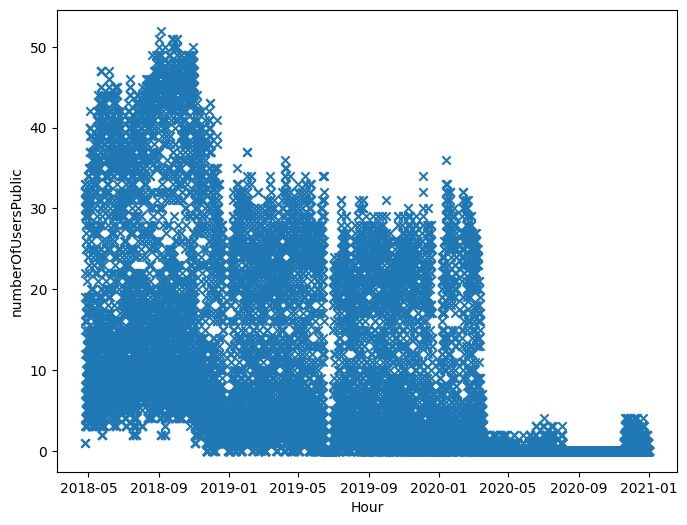

In [103]:
plt.figure(figsize = (8,6))
plt.scatter(Xp, Yp, marker="x")
plt.xlabel("Hour")
plt.ylabel("numberOfUsersPublic")
plt.show()

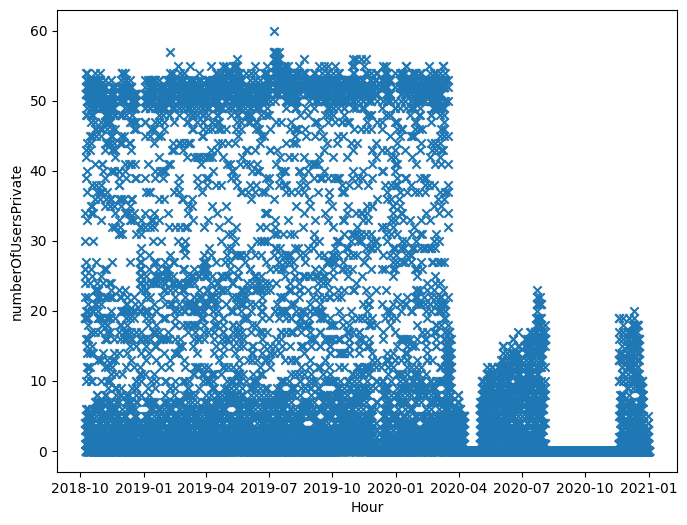

In [104]:
plt.figure(figsize = (8,6))
plt.scatter(Xpriv, Ypriv, marker="x")
plt.xlabel("Hour")
plt.ylabel("numberOfUsersPrivate")
plt.show()

In the second graph we can see that around July 2019, way more than 53 sessions(which is the max capacity) were running in the same hour. We did some research and found out that this could have been the cause of a big earthquake that was happening around that time in Los Angeles. The earthquake might have caused power outages and thus users might get disconnedted and reconnected. OLD

### Decision Tree

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [106]:
Xpu = public_sessions.drop(['numberOfUsers_public', 'Hour'], axis=1)
Xpr = private_sessions.drop(['numberOfUsers_private', 'Hour'], axis=1)

Ypu = public_sessions["numberOfUsers_public"]
Ypr = private_sessions["numberOfUsers_private"]

In [107]:
Xpu

,isWeekday,hourOfDay,dayOfMonth,month,year,temperature,precipitation
3,True,3.0,25.0,4.0,2018.0,12.0,0.0
4,True,4.0,25.0,4.0,2018.0,12.0,0.0
5,True,5.0,25.0,4.0,2018.0,12.0,0.0
6,True,6.0,25.0,4.0,2018.0,12.0,0.0
7,True,7.0,25.0,4.0,2018.0,12.0,0.0
...,...,...,...,...,...,...,...
23564,True,20.0,31.0,12.0,2020.0,13.0,0.0
23565,True,21.0,31.0,12.0,2020.0,12.0,0.0
23566,True,22.0,31.0,12.0,2020.0,12.0,0.0
23567,True,23.0,31.0,12.0,2020.0,11.0,0.0


### Train-Test-Split

In [108]:
## Use cross-validation to compare the performance of models
from sklearn.model_selection import cross_val_score

In [109]:
#Data split

# Split the data into training and testing sets
X_train_public, X_test_public, y_train_public, y_test_public = train_test_split(Xpu, Ypu, test_size=0.3, random_state=42)
X_train_private, X_test_private, y_train_private, y_test_private = train_test_split(Xpr, Ypr, test_size=0.3, random_state=41)

In [110]:
#For PUBLIC site

# Create a Decision Tree Regressor
public_regressor = DecisionTreeRegressor(max_depth=4)

# Fit the model on the training data
public_regressor.fit(X_train_public, y_train_public)

# Make predictions on the test set
y_pred_public = public_regressor.predict(X_test_public)

# Evaluate the model
mse = mean_squared_error(y_test_public, y_pred_public)
rmse = np.sqrt(mse)


print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 36.343437679698596
Root Mean Squared Error: 6.028551872522836


In [111]:
print(Xpu)

      isWeekday  hourOfDay  dayOfMonth  month    year  temperature  \
3          True        3.0        25.0    4.0  2018.0         12.0   
4          True        4.0        25.0    4.0  2018.0         12.0   
5          True        5.0        25.0    4.0  2018.0         12.0   
6          True        6.0        25.0    4.0  2018.0         12.0   
7          True        7.0        25.0    4.0  2018.0         12.0   
...         ...        ...         ...    ...     ...          ...   
23564      True       20.0        31.0   12.0  2020.0         13.0   
23565      True       21.0        31.0   12.0  2020.0         12.0   
23566      True       22.0        31.0   12.0  2020.0         12.0   
23567      True       23.0        31.0   12.0  2020.0         11.0   
23568      True        0.0         1.0    1.0  2021.0         10.0   

       precipitation  
3                0.0  
4                0.0  
5                0.0  
6                0.0  
7                0.0  
...              ... 

In [112]:
print(Xpr)

      isWeekday  hourOfDay  dayOfMonth  month    year  temperature  \
5          True        5.0         8.0   10.0  2018.0         14.0   
6          True        6.0         8.0   10.0  2018.0         13.0   
7          True        7.0         8.0   10.0  2018.0         15.0   
8          True        8.0         8.0   10.0  2018.0         17.0   
9          True        9.0         8.0   10.0  2018.0         18.0   
...         ...        ...         ...    ...     ...          ...   
19580      True       20.0        31.0   12.0  2020.0         13.0   
19581      True       21.0        31.0   12.0  2020.0         12.0   
19582      True       22.0        31.0   12.0  2020.0         12.0   
19583      True       23.0        31.0   12.0  2020.0         11.0   
19584      True        0.0         1.0    1.0  2021.0         10.0   

       precipitation  
5                0.0  
6                0.0  
7                0.0  
8                0.0  
9                0.0  
...              ... 

In [113]:
# Visualizing the decision tree structure
import graphviz
from sklearn.tree import export_graphviz  

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(public_regressor, out_file ='tree_structure_public.dot', 
               feature_names = ['isWeekday', 'hourOfDay', 'dayOfMonth', 'month', 'year', 'temperature', 'precipitation'])

In [114]:
cv_scores_public_dt = cross_val_score(public_regressor, X_train_public, y_train_public, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_scores_pub = np.sqrt(-cv_scores_public_dt)

# Display cross-validation scores
print("Cross Validation Scores(RMSE):", rmse_scores_pub)
print("Average CV Score(RMSE):", np.mean(rmse_scores_pub))
print("Number of CV Scores used in Average:", len(rmse_scores_pub))

Cross Validation Scores(RMSE): [5.73373832 6.12148236 5.78809222 5.82608876 6.04294756 6.00799013
 6.18728    5.66897583 5.9170786  5.86327331]
Average CV Score(RMSE): 5.915694709582308
Number of CV Scores used in Average: 10


In [115]:
#For PRIVATE site
# Create a Decision Tree Regressor
private_regressor = DecisionTreeRegressor(max_depth=4)

# Fit the model on the training data
private_regressor.fit(X_train_private, y_train_private)

# Make predictions on the test set
y_pred_private = private_regressor.predict(X_test_private)

# Evaluate the model
mse = mean_squared_error(y_test_private, y_pred_private)
rmse = np.sqrt(mse)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')


Mean Squared Error: 99.16905589096771
Root Mean Squared Error: 9.958366125573397


In [116]:
# Visualizing the decision tree structure
import graphviz
from sklearn.tree import export_graphviz  

# export the decision tree model to a tree_structure.dot file 
# paste the contents of the file to webgraphviz.com
export_graphviz(private_regressor, out_file ='tree_structure_private.dot', 
               feature_names = ['isWeekday', 'hourOfDay', 'dayOfMonth', 'month', 'year', 'temperature', 'precipitation'])

In [117]:
cv_scores_private_dt = cross_val_score(private_regressor, X_train_private, y_train_private, cv=10, scoring='neg_mean_squared_error')

# Convert negative MSE to positive RMSE
rmse_scores_priv = np.sqrt(-cv_scores_private_dt)

# Display cross-validation scores
print("Cross Validation Scores(RMSE):", rmse_scores_priv)
print("Average CV Score(RMSE):", np.mean(rmse_scores_priv))
print("Number of CV Scores used in Average:", len(rmse_scores_priv))

Cross Validation Scores(RMSE): [ 9.63338624  9.88409814  9.56086328  9.61346363 11.22765452 10.09068062
 10.06338611 10.30446641 10.03545458  9.74396197]
Average CV Score(RMSE): 10.015741549509034
Number of CV Scores used in Average: 10


### Neural Networks

In [118]:
import os
os.environ["KERAS_BACKEND"] = "torch"

In [119]:
import tensorflow as tf
#In order to not trigger a specific warning that says that  the name tf.losses.sparse_softmax_cross_entropy is deprecated, we are going to use the next compatible function:
tf.compat.v1.losses.sparse_softmax_cross_entropy


<function tensorflow.python.ops.losses.losses_impl.sparse_softmax_cross_entropy(labels, logits, weights=1.0, scope=None, loss_collection='losses', reduction='weighted_sum_by_nonzero_weights')>

In [120]:
##import libraries
from tensorflow import keras
from keras import Sequential # sequential model: https://keras.io/guides/sequential_model/
from keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier, KerasRegressor
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

### Public site ANN

In [121]:
tf.compat.v1.get_default_graph
tf.compat.v1.train.Optimizer

tensorflow.python.training.optimizer.Optimizer

In [122]:
#normalize training data
st_scaler = StandardScaler()
st_scaler.fit(X_train_public)
X_train_scaled_public = st_scaler.transform(X_train_public)

In [123]:
#Initializing the ANN
model_public = Sequential(
    [Dense(64, activation="relu", input_shape=[X_train_public.shape[1]]),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
     Dense(1,activation="relu")])

In [124]:
# Compiling the ANN

model_public.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [125]:
model_public.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                512       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 1)                 17        
                                                                 
Total params: 3137 (12.25 KB)
Trainable params: 3137 (12.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [126]:
tf.compat.v1.ragged.RaggedTensorValue
tf.compat.v1.executing_eagerly_outside_functions

<function tensorflow.python.framework.ops.executing_eagerly_outside_functions()>

In [127]:
epochs = 20

history = model_public.fit(X_train_scaled_public, y_train_public.values,
                   epochs=epochs, validation_split=0.3)

Epoch 1/20


361/361 [==============================] - 1s 2ms/step - loss: 72.5786 - mae: 5.2392 - mse: 72.5786 - val_loss: 29.8360 - val_mae: 3.2972 - val_mse: 29.8360
Epoch 2/20
361/361 [==============================] - 1s 1ms/step - loss: 22.8939 - mae: 2.8699 - mse: 22.8939 - val_loss: 20.1104 - val_mae: 2.5643 - val_mse: 20.1104
Epoch 3/20
361/361 [==============================] - 0s 1ms/step - loss: 18.9441 - mae: 2.5307 - mse: 18.9441 - val_loss: 18.2578 - val_mae: 2.3870 - val_mse: 18.2578
Epoch 4/20
361/361 [==============================] - 0s 1ms/step - loss: 17.3250 - mae: 2.3841 - mse: 17.3250 - val_loss: 16.6658 - val_mae: 2.2640 - val_mse: 16.6658
Epoch 5/20
361/361 [==============================] - 1s 2ms/step - loss: 16.2008 - mae: 2.2964 - mse: 16.2008 - val_loss: 15.5356 - val_mae: 2.1704 - val_mse: 15.5356
Epoch 6/20
361/361 [==============================] - 1s 2ms/step - loss: 15.2766 - mae: 2.2132 - mse: 15.2766 - val_loss: 14.9431 - val_mae: 2.1378 - val_mse: 14.9431
Epo

In [128]:
model_public.predict(X_train_scaled_public[:])

516/516 [==============================] - 0s 710us/step


array([[ 0.       ],
       [25.295048 ],
       [ 4.834761 ],
       ...,
       [20.659155 ],
       [ 7.1969495],
       [ 1.665347 ]], dtype=float32)

In [129]:
history_df_public = pd.DataFrame(history.history)
history_df_public

,loss,mae,mse,val_loss,val_mae,val_mse
0,72.578598,5.239161,72.578598,29.836031,3.297192,29.836031
1,22.893879,2.869885,22.893879,20.110405,2.564312,20.110405
2,18.944115,2.530654,18.944115,18.257772,2.387006,18.257772
3,17.325027,2.384145,17.325027,16.665760,2.263976,16.665760
4,16.200783,2.296364,16.200783,15.535625,2.170387,15.535625
5,15.276627,2.213160,15.276627,14.943089,2.137778,14.943089
6,14.549711,2.155533,14.549711,14.228808,2.071548,14.228808
7,13.912627,2.106710,13.912627,14.252558,2.073694,14.252558
8,13.389101,2.065034,13.389101,13.340852,1.978704,13.340852
9,13.244369,2.044127,13.244369,12.634967,1.963965,12.634967


In [130]:
root_metrics_df = history_df_public[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,8.519307,5.462237
1,4.784755,4.484463
2,4.352484,4.272911
3,4.162334,4.082372
4,4.025020,3.941526
5,3.908533,3.865629
6,3.814408,3.772109
7,3.729963,3.775256
8,3.659112,3.652513
9,3.639281,3.554570


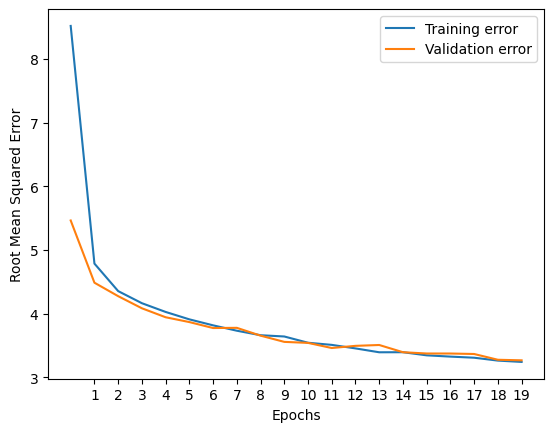

In [131]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [132]:
# Prediction on test set

X_test_scaled_public = st_scaler.transform(X_test_public)
y_pred_public = model_public.predict(X_test_scaled_public)

221/221 [==============================] - 0s 926us/step


In [133]:
# Report regression performance on test set

from sklearn.metrics import mean_squared_error, mean_absolute_error


print("RMSE: ", np.sqrt(mean_squared_error(y_test_public, y_pred_public)))
print("MAE: ", mean_absolute_error(y_test_public, y_pred_public))

RMSE:  3.2662801348194557
MAE:  1.830653900106186


In [134]:
def baseline_model():
 # create model
    model = Sequential(
    [Dense(64, activation="relu", input_shape=[X_train_public.shape[1]]),
    Dense(32, activation="relu"),
    Dense(16, activation="relu"),
    Dense(1,activation="relu")])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [135]:
estimator = KerasRegressor(model=baseline_model, epochs=20, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train_scaled_public, y_train_public, cv=kfold, scoring='neg_mean_squared_error')

In [136]:
print("Cross Validation Scores public: ", -1*results)
print("Average CV Score: ", -1*results.mean())
print("Number of CV Scores used in Average: ", len(results))

Cross Validation Scores public:  [ 9.5392686   9.94296349  8.03494109  9.58726543 12.73790139  9.2625475
 11.20468881 10.36638575  9.22138663  8.94104358]
Average CV Score:  9.883839227838438
Number of CV Scores used in Average:  10


### Nice scores!

### Private site Neural Network

In [137]:
#normalize training data
st_scaler = StandardScaler()
st_scaler.fit(X_train_private)
X_train_scaled_private = st_scaler.transform(X_train_private)

In [138]:
#Initializing the ANN
model_private = Sequential(
    [Dense(128, activation="relu", input_shape=[X_train_private.shape[1]]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
     Dense(1, activation = 'relu')])

In [139]:
# Compiling the ANN

model_private.compile(loss='mse',
             optimizer="adam",
             metrics=["mae", "mse"])

In [140]:
model_private.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 128)               1024      
                                                                 
 dense_45 (Dense)            (None, 64)                8256      
                                                                 
 dense_46 (Dense)            (None, 32)                2080      
                                                                 
 dense_47 (Dense)            (None, 1)                 33        
                                                                 
Total params: 11393 (44.50 KB)
Trainable params: 11393 (44.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [141]:
epochs = 20

history = model_private.fit(X_train_scaled_private, y_train_private.values,
                   epochs=epochs, validation_split=0.3)

Epoch 1/20


300/300 [==============================] - 1s 2ms/step - loss: 204.0446 - mae: 8.8899 - mse: 204.0446 - val_loss: 98.3968 - val_mae: 5.5640 - val_mse: 98.3968
Epoch 2/20
300/300 [==============================] - 0s 2ms/step - loss: 79.6847 - mae: 4.7068 - mse: 79.6847 - val_loss: 79.7958 - val_mae: 4.6191 - val_mse: 79.7958
Epoch 3/20
300/300 [==============================] - 0s 2ms/step - loss: 70.2361 - mae: 4.2661 - mse: 70.2361 - val_loss: 77.8275 - val_mae: 4.3145 - val_mse: 77.8275
Epoch 4/20
300/300 [==============================] - 0s 2ms/step - loss: 66.8365 - mae: 4.1170 - mse: 66.8365 - val_loss: 72.7602 - val_mae: 4.1567 - val_mse: 72.7602
Epoch 5/20
300/300 [==============================] - 1s 2ms/step - loss: 64.8520 - mae: 4.0063 - mse: 64.8520 - val_loss: 68.1938 - val_mae: 4.1388 - val_mse: 68.1938
Epoch 6/20
300/300 [==============================] - 1s 2ms/step - loss: 61.0176 - mae: 3.8732 - mse: 61.0176 - val_loss: 68.8149 - val_mae: 4.0021 - val_mse: 68.8149
E

In [142]:
model_private.predict(X_train_scaled_private[:])

  1/429 [..............................] - ETA: 31s

429/429 [==============================] - 0s 898us/step


array([[7.826537 ],
       [5.638177 ],
       [7.9729853],
       ...,
       [0.       ],
       [0.       ],
       [0.       ]], dtype=float32)

In [143]:
history_df_private = pd.DataFrame(history.history)
history_df_private

,loss,mae,mse,val_loss,val_mae,val_mse
0,204.044586,8.889883,204.044586,98.396774,5.563957,98.396774
1,79.684654,4.706817,79.684654,79.795753,4.619114,79.795753
2,70.236069,4.266088,70.236069,77.827515,4.314495,77.827515
3,66.836479,4.117006,66.836479,72.760170,4.156687,72.760170
4,64.852005,4.006258,64.852005,68.193817,4.138832,68.193817
5,61.017601,3.873175,61.017601,68.814911,4.002110,68.814911
6,61.351822,3.870441,61.351822,66.665489,3.928893,66.665489
7,58.785889,3.750270,58.785889,62.985996,3.907239,62.985996
8,57.382713,3.705805,57.382713,64.359505,3.909232,64.359505
9,56.743961,3.697811,56.743961,60.585060,3.665184,60.585060


In [144]:
root_metrics_df = history_df_private[["mse", "val_mse"]].apply(np.sqrt)
root_metrics_df.rename({"mse":"rmse", "val_mse":"val_rmse"}, axis=1, inplace=True)
root_metrics_df

,rmse,val_rmse
0,14.284418,9.919515
1,8.926626,8.932847
2,8.380696,8.821990
3,8.175358,8.529957
4,8.053074,8.257955
5,7.811376,8.295475
6,7.832740,8.164894
7,7.667196,7.936372
8,7.575138,8.022438
9,7.532859,7.783641


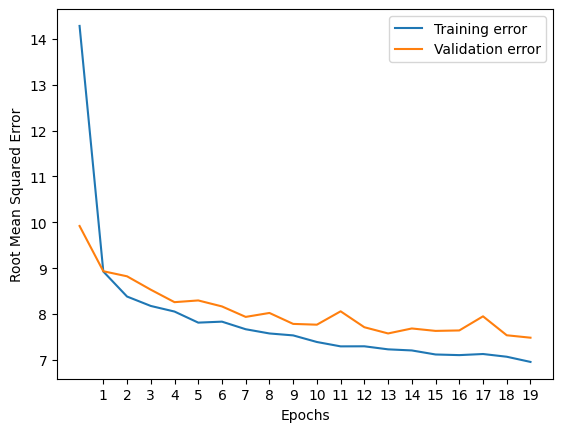

In [145]:
plt.Figure(figsize=(14,6), dpi=100)

plt.plot(root_metrics_df["rmse"], label = 'Training error')
plt.plot(root_metrics_df["val_rmse"], label = 'Validation error')

plt.xlabel("Epochs")
plt.ylabel("Root Mean Squared Error")

# plt.xlim([0, epochs])
plt.xticks(range(1,20))
plt.legend()

plt.show()

In [146]:
# Prediction on test set

X_test_scaled_private = st_scaler.transform(X_test_private)
y_pred_private = model_private.predict(X_test_scaled_private)

184/184 [==============================] - 0s 867us/step


In [147]:
# Report regression performance on test set

from sklearn.metrics import mean_squared_error, mean_absolute_error


print("RMSE: ", np.sqrt(mean_squared_error(y_test_private, y_pred_private)))
print("MAE: ", mean_absolute_error(y_test_private, y_pred_private))

RMSE:  7.056111485538151
MAE:  3.395698762504187


In [148]:
def baseline_model2():
 # create model
    model = Sequential(
    [Dense(128, activation="relu", input_shape=[X_train_public.shape[1]]),
    Dense(64, activation="relu"),
    Dense(32, activation="relu"),
    Dense(1,activation="relu")])
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [149]:
estimator = KerasRegressor(model=baseline_model2, epochs=20, batch_size=10, verbose=0)
kfold = KFold(n_splits=10)
results2 = cross_val_score(estimator, X_train_scaled_private, y_train_private, cv=kfold, scoring='neg_mean_squared_error')

In [150]:
print("Cross Validation Scores Private: ", -1*results2)
print("Average CV Score: ", -1*results2.mean())
print("Number of CV Scores used in Average: ", len(results2))

Cross Validation Scores Private:  [45.68118508 43.16738626 34.53994914 44.52263076 48.08842873 55.87245922
 44.55119635 43.78470038 53.98940001 42.97780285]
Average CV Score:  45.71751387816569
Number of CV Scores used in Average:  10
